Dataset: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

Here, dataset is already present in jupyter notebook directory

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


To check no. of classes in train folder of dataset:

In [ ]:
len(os.listdir('/content/drive/MyDrive/MLDataset/PlantDiseaseDataset/New Plant Diseases Dataset(Augmented)/train'))

38

# Pre-processing the dataset

In [ ]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)


In [ ]:
train = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/PlantDiseaseDataset/New Plant Diseases Dataset(Augmented)/train",
                                          target_size = (256, 256),
                                          batch_size = 32)

val = val_datagen.flow_from_directory(directory = "/content/drive/MyDrive/PlantDiseaseDataset/New Plant Diseases Dataset(Augmented)/valid",
                                          target_size = (256, 256),
                                          batch_size = 32)

Found 59658 images belonging to 38 classes.
Found 0 images belonging to 0 classes.


Now we are done loading the dataset into the notebook, below are some graphs indicating some images from the train folder of the dataset

# Visualizing some of our data

In [ ]:
t_img, label = train.next()
t_img.shape

(32, 256, 256, 3)

next() is used to load up the next batch of images for training...

so t_img has 32 images of 256 x 256 and 3 channel per image(RGB)

In [ ]:
def plotImage(img_arr, label):
    for im, l in zip(img_arr, label):
        plt.figure(figsize = (5,5))
        plt.imshow(im/255)
        plt.show()


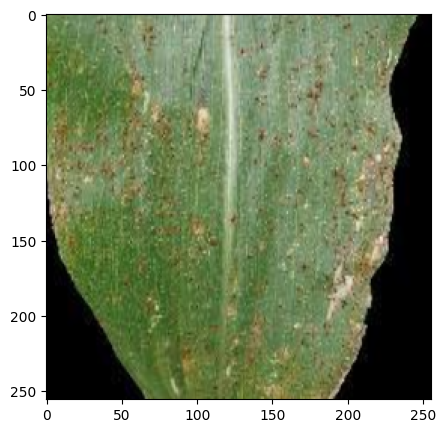

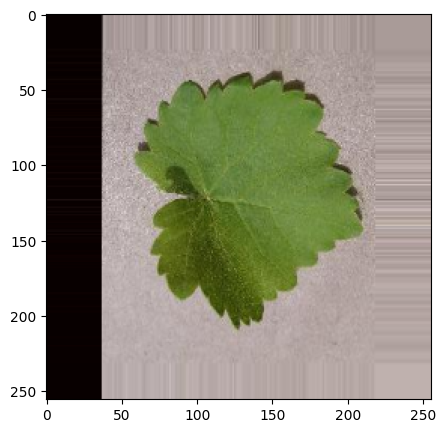

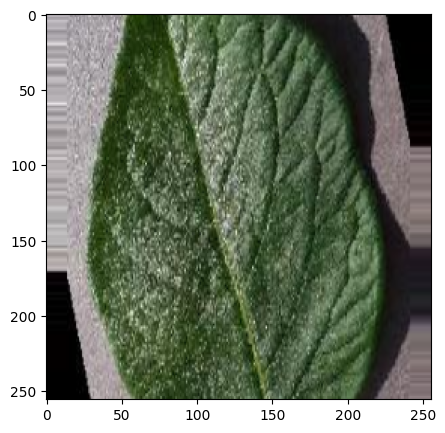

In [ ]:
plotImage(t_img[:3], label[:3])

In [ ]:
# # Import necessary libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import keras
# import os
# from keras.preprocessing.image import ImageDataGenerator
# # from keras.applications.resnet50 import ResNet50, preprocess_input
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# from keras.layers import Dense, GlobalAveragePooling2D
# from keras.models import Model
# from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# # Define the path to your dataset
# train_dir = "/content/drive/MyDrive/MLDataset/PlantDiseaseDataset/New Plant Diseases Dataset(Augmented)/train"
# valid_dir = "/content/drive/MyDrive/MLDataset/PlantDiseaseDataset/New Plant Diseases Dataset(Augmented)/valid"
# test_dir = "/content/drive/MyDrive/MLDataset/PlantDiseaseDataset/test"

# # Define the number of classes in your dataset
# num_classes = 38

# # Define the batch size
# batch_size = 32

# # Data augmentation for training images
# train_datagen = ImageDataGenerator(
#     zoom_range=0.5,
#     shear_range=0.3,
#     horizontal_flip=True,
#     preprocessing_function=preprocess_input
# )

# # Validation data generator without data augmentation
# val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# # Load training data
# train_generator = train_datagen.flow_from_directory(
#     directory=train_dir,
#     target_size=(256, 256),
#     batch_size=batch_size,
#     class_mode='categorical',
#     shuffle=True
# )

# # Load validation data
# valid_generator = val_datagen.flow_from_directory(
#     directory=valid_dir,
#     target_size=(256, 256),
#     batch_size=batch_size,
#     class_mode='categorical',
#     shuffle=False
# )

# # Load test data
# test_generator = val_datagen.flow_from_directory(
#     directory=test_dir,
#     target_size=(256, 256),
#     batch_size=batch_size,
#     class_mode='categorical',
#     shuffle=False
# )

# # Create the base ResNet50 model
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# # Fine-tune the model by unfreezing the top layers
# for layer in base_model.layers[:-10]:
#     layer.trainable = False

# # Add a custom fully connected layer
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(512, activation='relu')(x)
# predictions = Dense(num_classes, activation='softmax')(x)

# # Create the final model
# model = Model(inputs=base_model.input, outputs=predictions)

# # Compile the model with an optimizer, loss function, and metrics
# model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# # Define callbacks for early stopping and model checkpoint
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)
# model_checkpoint = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)

# # Define a learning rate schedule for learning rate decay
# def lr_schedule(epoch):
#     if epoch < 10:
#         return 0.0001
#     elif epoch < 20:
#         return 0.00001
#     else:
#         return 0.000001

# # Train the model with data augmentation, early stopping, model checkpoint, and learning rate scheduling
# history = model.fit(
#     train_generator,
#     steps_per_epoch=32,
#     epochs=30,
#     validation_data=valid_generator,
#     validation_steps=len(valid_generator),
#     callbacks=[early_stopping, model_checkpoint, LearningRateScheduler(lr_schedule)],
# )

# # Evaluate the model on the test data
# test_accuracy = model.evaluate(test_generator)[1]
# print(f'The accuracy of the model on the test data is: {test_accuracy * 100}%')


# Building our model

In [ ]:
import keras
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top = False)


80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

Adding flatten and dense layers to the model

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units = 38, activation = 'softmax')(X)

#Creating our model
model = Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Early stopping and model checkpoints

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = "val_accuracy",
                   min_delta = 0.01,
                   patience = 3,
                   verbose=1)

mc = ModelCheckpoint(filepath="best_model.h5",
                     monitor = "val_accuracy",
                     min_delta = 0.01,
                     patience = 3,
                     verbose = 1,
                     save_best_only = True)

cb = [es, mc]

his = model.fit(train,
                steps_per_epoch = 64,
                epochs = 30,
                verbose = 1,
                callbacks = cb,
                validation_data = val,
                validation_steps = 32)


Epoch 1/30
50/50 [==============================] - ETA: 0s - loss: 8.1927 - accuracy: 0.8306

50/50 [==============================] - 368s 7s/step - loss: 8.1927 - accuracy: 0.8306
Epoch 2/30
50/50 [==============================] - ETA: 0s - loss: 8.7096 - accuracy: 0.8087

50/50 [==============================] - 360s 7s/step - loss: 8.7096 - accuracy: 0.8087
Epoch 3/30
22/50 [============>.................] - ETA: 3:19 - loss: 9.9028 - accuracy: 0.8026

UnknownError: ignored

In [ ]:
# h = his.history
# h.keys()

In [ ]:
# plt.plot(h['accuracy'])
# plt.plot(h['val_accuracy'], c = 'red')
# plt.title("acc vs val_acc")
# plt.xlim(0, 7)
# plt.ylim(0.4, 1)
# plt.legend(['accuracy', 'val_accuracy'])
# plt.show()

In [ ]:
# plt.plot(h['loss'])
# plt.plot(h['val_loss'], c = 'red')
# plt.title("loss vs val_loss")
# # plt.xlim(0, 7)
# # plt.ylim(0.4, 1)
# plt.legend(['loss', 'val_loss'])
# plt.show()

In [ ]:
from keras.models import load_model
model = load_model("best_model.h5")
val_accuracy = model.evaluate(val)[1]
print(f'The accuracy of your model on the validation data is {val_accuracy * 100:.2f}%')

In [ ]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))


In [ ]:
def prediction(path):
  img = load_img(path, target_size = (256, 256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis = 0)
  pred = np.argmax(model.predict(img))
  print(f'The image belongs to {ref[pred]}')

Apple, Blueberry, Cherry, Corn, Grape, Peach, Pepper, Potato, Strawberry, Tomato

In [ ]:
path = "/content/drive/MyDrive/PlantDiseaseDataset/test/TomatoYellowCurlVirus5.JPG"
prediction(path)